In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
# from apexmf import apexmf_pst_viz


In [5]:
sys.path.insert(0, 'D:/spark-brc_gits/apexmf_git/apexmf')
import apexmf_pst_viz, apexmf_pst_utils
from salt.salt_handler import SaltAnalysis, SaltViz, get_stats

In [6]:
wd = "d:/Projects/Watersheds/Animas/Analysis/AMRSs/manul_calibration/Animas_AMRS-Fire"
os.chdir(wd)

In [7]:
apexmf_con = pd.read_csv('apexmf.con', sep='\t', names=['names', 'vals'], index_col=0, comment="#")

In [8]:
apexmf_con

,vals
names,
wd,d:/Projects/Watersheds/Animas/Analysis/AMRSs/manul_calibration/Animas_AMRS-Fire
mfwd,d:/Projects/Watersheds/Animas/Analysis/AMRSs/manul_calibration/Animas_AMRS-Fire/MODFLOW
sim_start,1/1/1987
cal_start,1/1/1992
cal_end,12/31/2011
cha_file,n
subs,n
gw_level,n
grids,n


In [9]:
sim_start = '1/1/1987'
cal_start = '1/1/1992'
cal_end = '12/31/2011'
m1 = SaltAnalysis(wd)

In [48]:
os.getcwd()

'd:\\Projects\\Watersheds\\Animas\\Analysis\\AMRSs\\manul_calibration\\Animas_AMRS-Fire'

In [41]:
salt_df = m1.load_salt_cha_result()

In [42]:
# only so4
so4_df = pd.DataFrame()
for i in range(1, 76):
    sim_df = m1.read_salt_sim_cha(salt_df, i, sim_start, cal_start, cal_end).resample('M').mean()
    so4_df = pd.concat([so4_df, sim_df.load_so4], axis=1)

<Axes: >

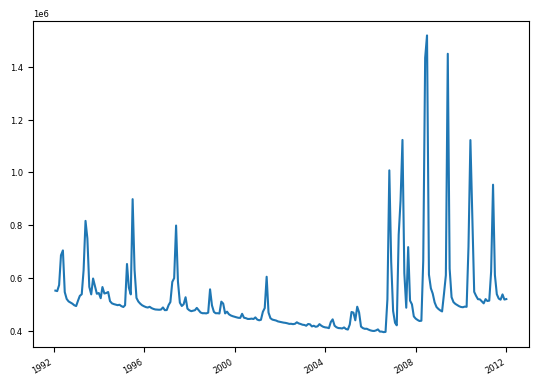

In [47]:
so4_df.iloc[:, 74].plot()

<Axes: >

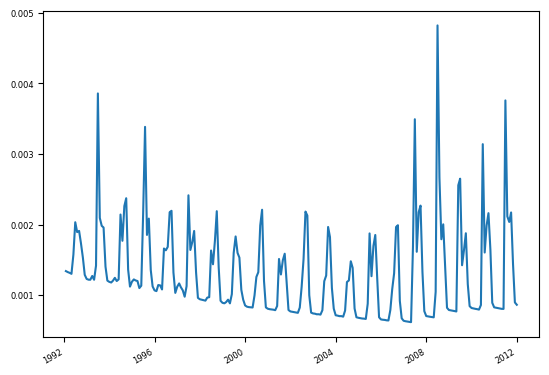

In [44]:
so4_df.iloc[:, 1].plot()

<Axes: >

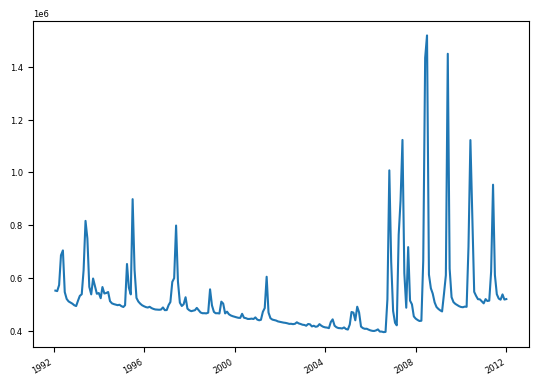

In [17]:
so4_df.iloc[:, 2].plot()

In [ ]:
sim_df09['load_so4'].plot()

In [ ]:
sim_df12 = m1.read_salt_sim_cha(salt_df, 12, sim_start, cal_start, cal_end).resample('M').mean()
sim_df12['load_so4'].plot()

In [ ]:
sim_df12['load_so4'].plot()

In [207]:
sub_id = 12
# sim_df = m1.read_salt_sim_cha(salt_df, sub_id, sim_start, cal_start, cal_end)
# obd_df = m1.read_salt_obd_cha(sub_id, time_step='day')
# obd_df = obd_df.iloc[:, 1:]

sim_df = m1.read_salt_sim_cha(salt_df, sub_id, sim_start, cal_start, cal_end).resample('M').mean()
obd_df = m1.read_salt_obd_cha(sub_id, time_step='mon')
obd_df = obd_df[~obd_df.index.duplicated(keep='first')]

load_so4
(-4.3319, 80073.7009, 89.1027, 0.0013)


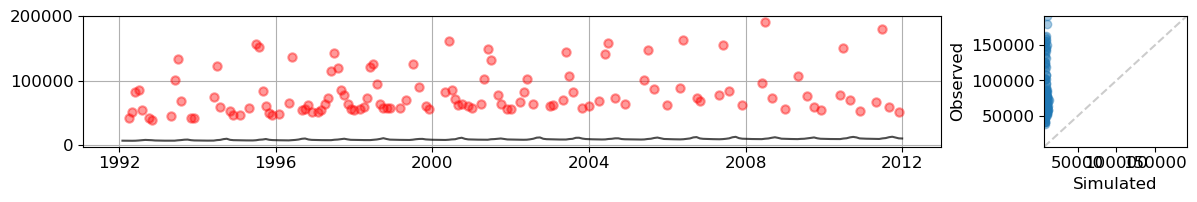

load_na
(-1.3217, 1494.3895, 81.4739, 0.6394)


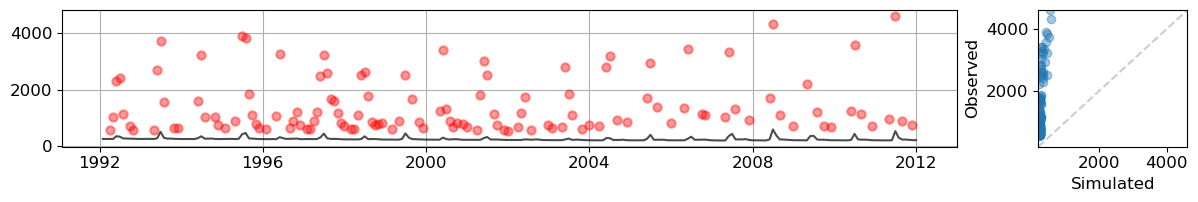

load_k
(-1.0172, 619.045, 91.2525, 0.6748)


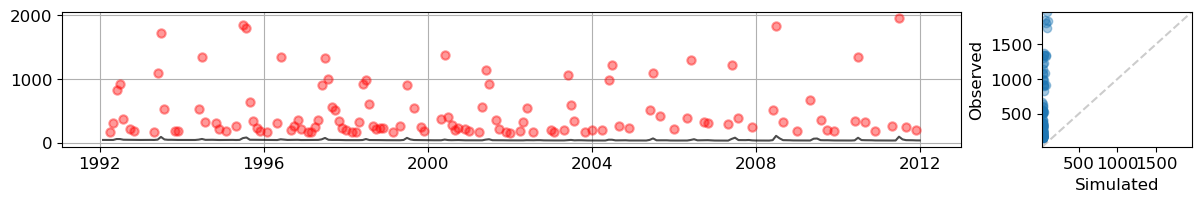

load_mg
(-1.2864, 2168.8229, 78.4088, 0.6273)


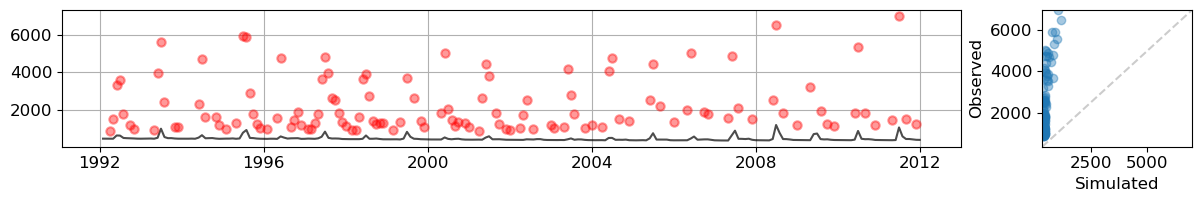

load_cl
(-1.7559, 600.1145, 92.4827, 0.361)


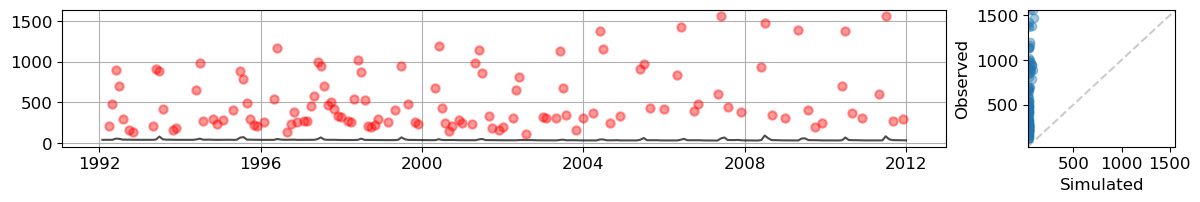

load_ca
(-1.3026, 28445.4624, 69.6504, 0.6671)


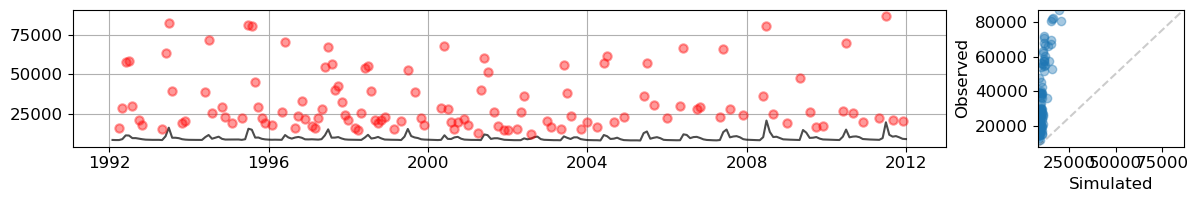

load_hco3
(-0.164, 23428.623, 69.0688, 0.6015)


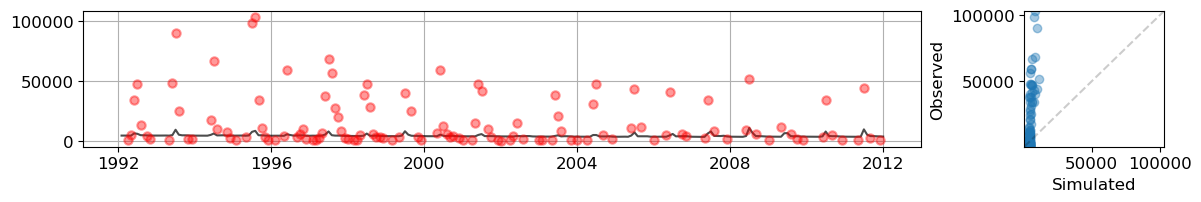

In [208]:
for o in obd_df.columns:
    comdf = m1.sim_obd_df(sim_df, o, obd_df, o)
    print(o)
    print(get_stats(comdf['1/1/1992':'12/31/2011']))
    fig, ax = plt.subplots(1, 2, figsize=(12, 2), gridspec_kw={'width_ratios': [6, 1]})
    SaltViz(comdf['1/1/1992':'12/31/2011']).hydro_sim_obd02(ax[0])
    SaltViz(comdf['1/1/1992':'12/31/2011']).reg_line02(ax[1])
    fig.tight_layout()
    plt.show()
    

In [186]:
cha_file = 'SITE75.RCH'
subs = [12, 57, 75]
st_date='1/1/1987'
ed_date='12/31/2011'
cal_start = '1/1/1992'
rch_file = 'SITE75.RCH'
obd_nams = ['str_{:03d}'.format(i) for i in subs]

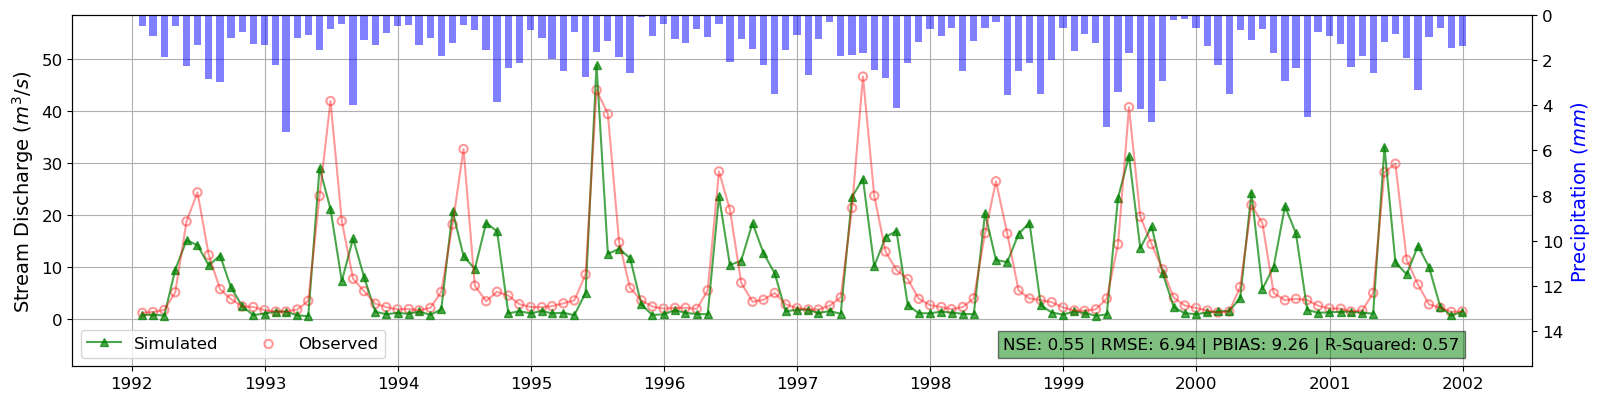

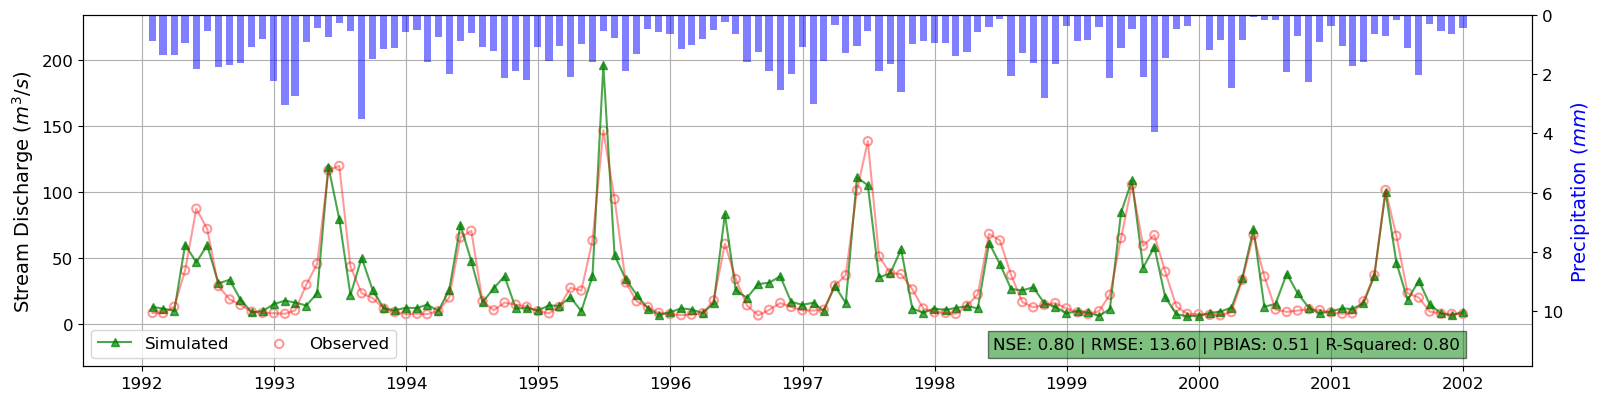

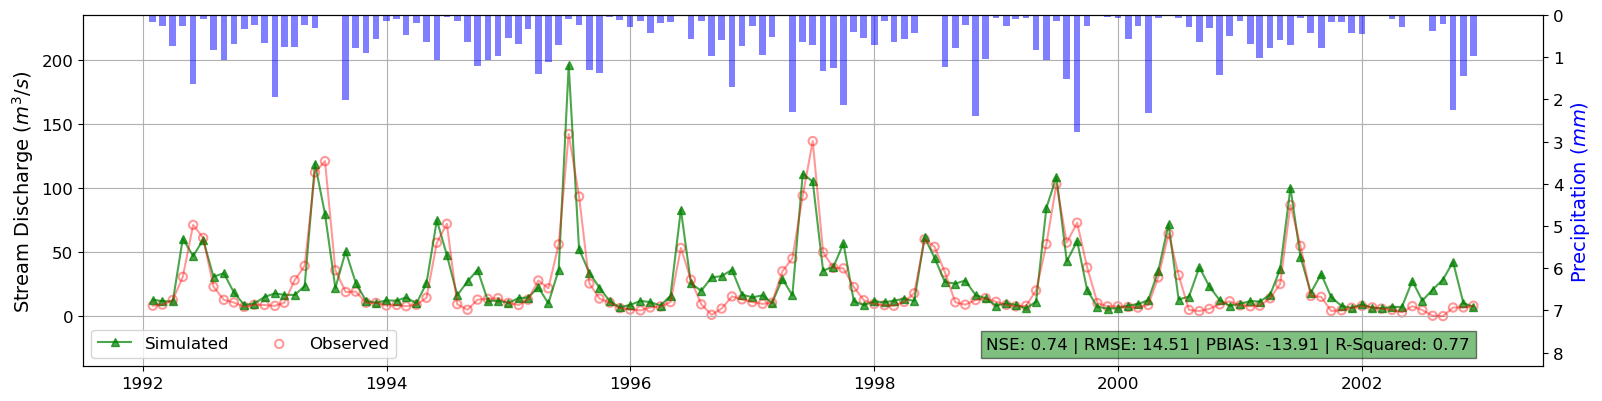

In [172]:
for i, j in zip(subs, obd_nams):
    df = apexmf_pst_viz.stf_df(cha_file, st_date, i, j, time_step='M')
    df = df['1/1/1992':'12/31/2011']
    apexmf_pst_viz.stf_plot(df)

# observation data analysis

In [ ]:
obd_df_day = m1.read_salt_obd_cha(sub_id, time_step='day')
obd_df_mon = m1.read_salt_obd_cha(sub_id, time_step='mon')

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(14, 10))
for i, sub_id in enumerate([9, 12, 75]):
    obd_df = m1.read_salt_obd_cha(sub_id, time_step='day')
    obd_mdf = m1.read_salt_obd_cha(sub_id, time_step='mon')
    for j, obd_nam in enumerate(['load_ca', 'load_mg', 'load_k', 'load_na', 'load_so4']):
        axes[j, i].hist(obd_df[obd_nam], bins=15, alpha=0.5)
        axes[j, i].hist(obd_mdf[obd_nam], bins=15, alpha=0.5)
        axes[j, i].tick_params(axis='both', which='major', labelsize=12)
        
fig.legend(['Daily', 'Monthly Average'], ncols=2, loc='upper center', fontsize=12)
# fig.tight_layout()
plt.show()
